__Running DNN and Random Forrest on the Dataset__

Pre-processing data:

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load the dataset
data_path = 'E:/Datasets/CSE445 Dataset/10k_songs_analysed.csv'
df = pd.read_csv(data_path)
df = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year', 'genre', 'mode', 'popularity', 'duration_ms', 'time_signature'])


In [11]:
# Features and Labels
X = df[['energy', 'valence', 'acousticness', 'tempo', 'loudness']]
y = df['Mood']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


Building and Training Deep Neural Network:

In [12]:
def build_dnn_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(y)), activation='softmax')  # Use softmax for probability output
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dnn_model = build_dnn_model()
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


d:\Software\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.4995 - loss: 1.1093
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7177 - loss: 0.6505
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7813 - loss: 0.5163
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8289 - loss: 0.4214
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8333 - loss: 0.3883
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8604 - loss: 0.3412
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8764 - loss: 0.3093
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8888 - loss: 0.2852
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9020 - loss: 0.2558
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9049 - loss: 0.2492
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9076 - loss: 0.2325
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

Predictions and Evaluation for DNN:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


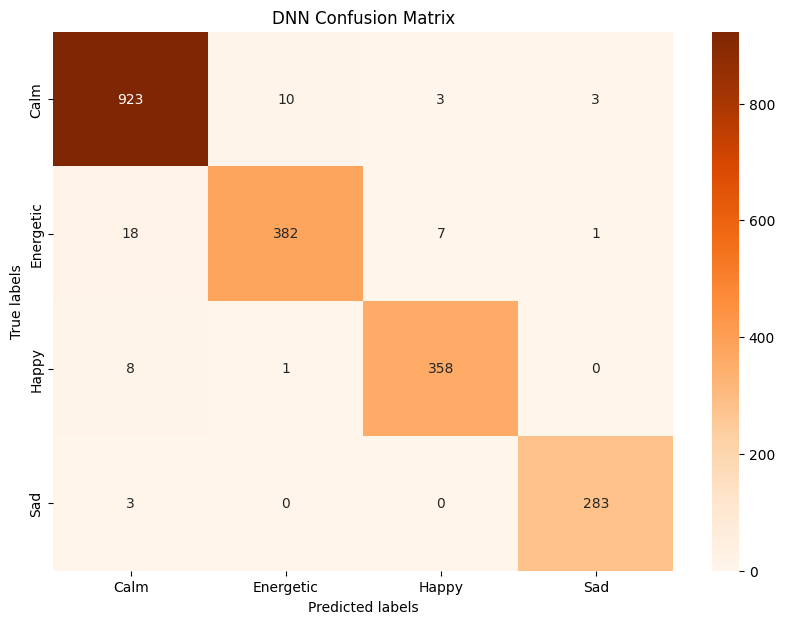

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       939
           1       0.97      0.94      0.95       408
           2       0.97      0.98      0.97       367
           3       0.99      0.99      0.99       286

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [13]:
# Predicting probabilities instead of classes
y_prob_dnn = dnn_model.predict(X_test)

# For evaluation purposes converting probabilities to class labels
y_pred_dnn = np.argmax(y_prob_dnn, axis=1)
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='g', cmap='Oranges', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DNN Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_dnn))


Building and Training Random Forest Model

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions and Evaluation for Random Forest

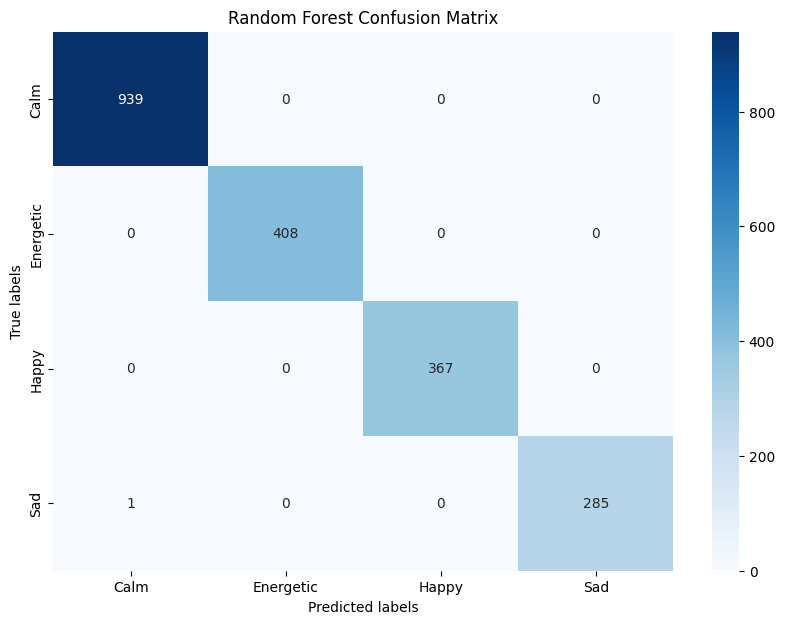

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [15]:
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_rf))
